In [1]:
!git clone https://github.com/sbooeshaghi/colosseum.git

Cloning into 'colosseum'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 529 (delta 0), reused 4 (delta 0), pack-reused 524
Receiving objects: 100% (529/529), 11.39 MiB | 24.97 MiB/s, done.
Resolving deltas: 100% (281/281), done.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import matplotlib.patches as mpatches
import math
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as mtick


plt.rcParams.update({'font.size': 20})
%config InlineBackend.figure_format = 'retina'

In [10]:
df = pd.read_csv("/content/colosseum/data/experiment_2.csv")

columns = {"Dwell time (s)": "time",
           "Trial":	"experiment",
           "Before (g)": "empty_weight",
           "After (g)":	"total_weight",
           "Tube number": "tube_number",
           "Difference (g)": "fluid_weight",
           "Expected (g)": "expected",
           "Percent error (%)": "error"}

df = df.rename(columns=columns)
df["fluid_vol"] = df["fluid_weight"]/1

In [11]:
df.head()

,experiment,tube_number,time,empty_weight,total_weight,fluid_weight,expected,error,fluid_vol
0,1,1,12,1.055,1.128,0.073,0.075,-2.666667,0.073
1,1,2,24,1.064,1.187,0.123,0.150,-18.000000,0.123
2,1,3,36,1.058,1.281,0.223,0.225,-0.888889,0.223
3,1,4,48,1.057,1.329,0.272,0.300,-9.333333,0.272
4,1,5,60,1.063,1.385,0.322,0.375,-14.133333,0.322


In [17]:
experiments = np.unique(df["experiment"].values)
tpts = np.arange(12, 252, 12)
means = df.groupby(["time"])["fluid_vol"].mean()

In [18]:
means

time
12     0.071000
24     0.124667
36     0.208333
48     0.272667
60     0.357333
72     0.474667
84     0.515333
96     0.600667
108    0.651333
120    0.718333
132    0.845667
144    0.893667
156    0.947000
168    1.021667
180    1.158000
192    1.163000
204    1.275667
216    1.356667
228    1.374667
240    1.516333
Name: fluid_vol, dtype: float64

In [19]:
tpts

array([ 12,  24,  36,  48,  60,  72,  84,  96, 108, 120, 132, 144, 156,
       168, 180, 192, 204, 216, 228, 240])

In [20]:
slope, intercept, r_value, p_value, std_err = stats.linregress(tpts, means)

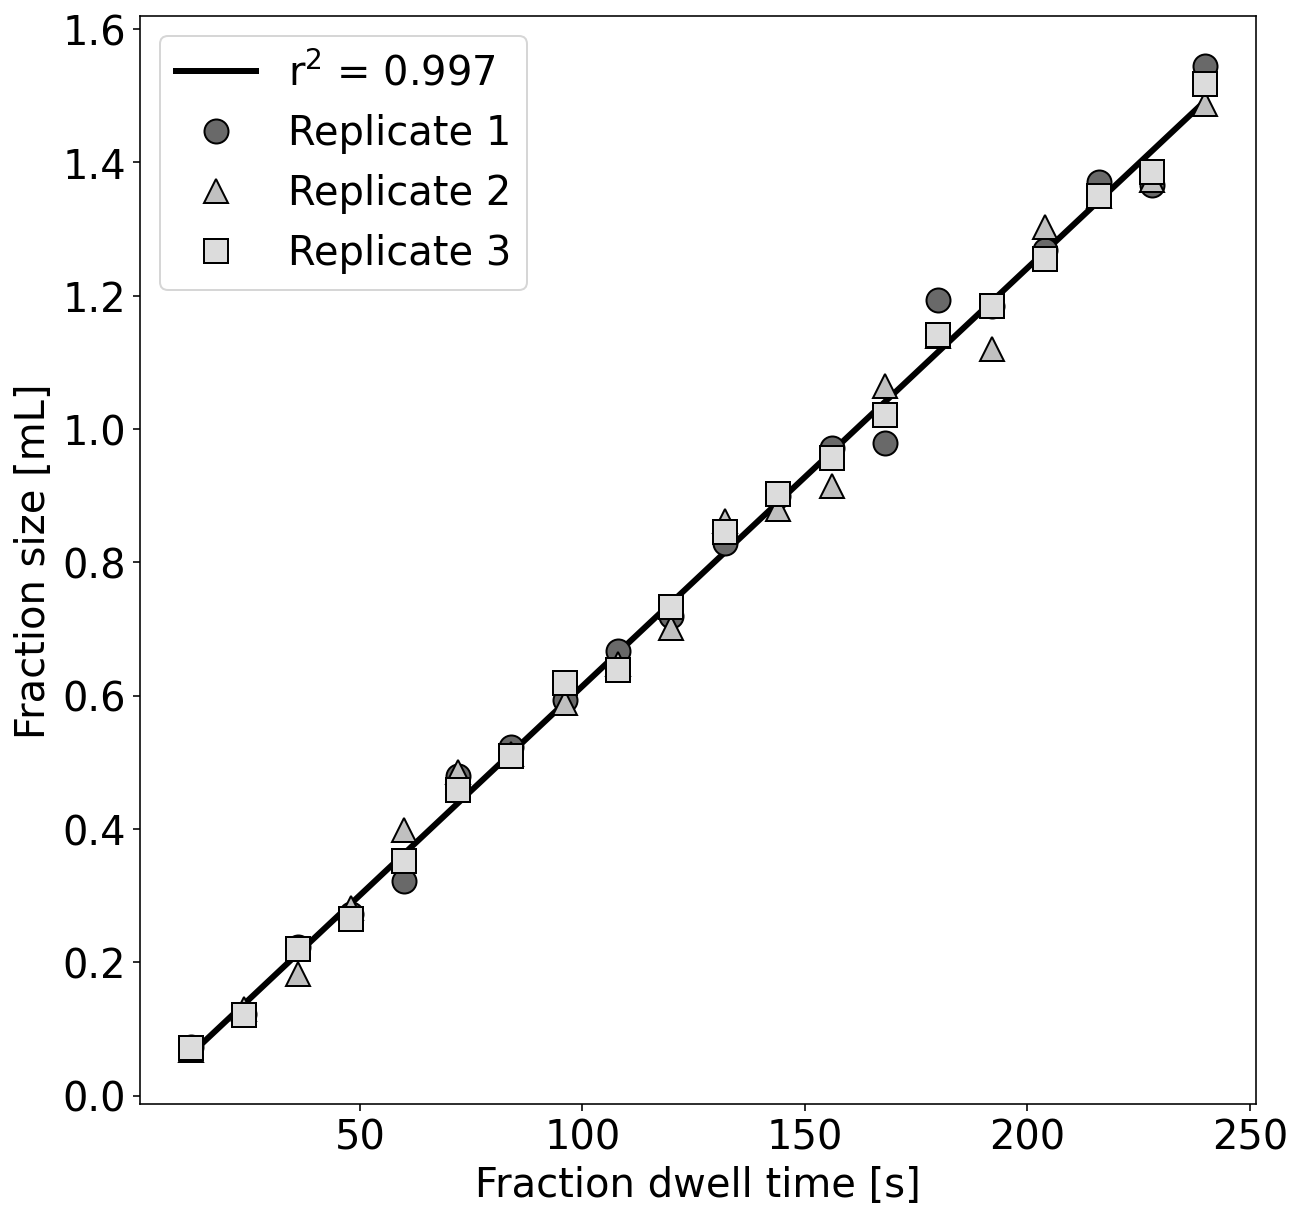

In [21]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.plot(tpts, intercept + slope*tpts, 'black', label='r$^2$ = {:.3f}'.format(r_value**2), linewidth=3)


shapes = ["o", "^", "s"]
colors = ["dimgrey", "silver", "gainsboro"]

for idx, exp in enumerate(experiments):
    tmp = df[df["experiment"] == exp]
    cumsum = tmp["fluid_vol"].values.cumsum()
    
    ax.plot(tmp["time"].values, tmp["fluid_vol"].values, label="Replicate {}".format(idx+1),linestyle='None', marker=shapes[idx], color=colors[idx], markeredgecolor='black', markersize=12)
    
ax.set(**{
    "xlabel": "Fraction dwell time [s]",
    "ylabel": "Fraction size [mL]"
    })


ax.legend()

fig.savefig("fraction_dwelltime.png", bbox_inches='tight', dpi=300)

plt.show()